# IPL MATCH ANALYSIS

In [1]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
# load the data set
match_df  = pd.read_csv("data/matches.csv")
match_df.sample(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
565,566,2015,Chandigarh,2015-05-13,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kings XI Punjab,22,0,AR Patel,"Punjab Cricket Association Stadium, Mohali",JD Cloete,C Shamshuddin,NaN
70,71,2008,Chennai,2008-04-26,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,0,Chennai Super Kings,0,9,JDP Oram,"MA Chidambaram Stadium, Chepauk",BF Bowden,AV Jayaprakash,NaN
193,194,2010,Mumbai,2010-03-25,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba,NaN
94,95,2008,Kolkata,2008-05-13,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,23,0,Shoaib Akhtar,Eden Gardens,Asad Rauf,IL Howell,NaN
250,251,2011,Kolkata,2011-04-17,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,L Balaji,Eden Gardens,Aleem Dar,RB Tiffin,NaN
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
527,528,2015,Pune,2015-04-15,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,bat,normal,0,Delhi Daredevils,0,5,MA Agarwal,Maharashtra Cricket Association Stadium,CB Gaffaney,K Srinath,NaN
85,86,2008,Mumbai,2008-05-07,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,7,A Nehra,Dr DY Patil Sports Academy,DJ Harper,RE Koertzen,NaN
191,192,2010,Bangalore,2010-03-23,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,0,Royal Challengers Bangalore,36,0,RV Uthappa,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,NaN
419,420,2013,Jaipur,2013-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,SV Samson,Sawai Mansingh Stadium,M Erasmus,K Srinath,NaN


In [5]:
div_df = pd.read_csv("Data/deliveries.csv")
div_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [6]:
#peeking at the data set
#looking what the data set contains
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
div_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# EDA ANALYSIS

In [8]:
#no of matches won by different teams
match_df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [9]:
# no of teams played ipl
match_df['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64

In [13]:
#checking for missing values
#isnull() method checks for null 

#in the we are interested in looking only those  rows where the  isnull() for winner is true 
match_df[match_df['winner'].isnull() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [14]:
#replacing null results
#here we are replacing all the null values of winner with 'Draw'
match_df['winner'].fillna('Draw' , inplace = True)

In [15]:
#after performing the above query .. all the null values is replaced with Draw .
match_df[match_df['winner'].isnull() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [35]:
#encoding all the team names
team_encodings = {
    'Mumbai Indians':1, 
    'Kolkata Knight Riders':2,
    'Royal Challengers Bangalore':3,
    'Deccan Chargers':4,
    'Chennai Super Kings':5,
    'Rajasthan Royals':6, 
    'Delhi Daredevils':7, 
    'Gujarat Lions':8,
    'Kings XI Punjab':9,
    'Sunrisers Hyderabad':10,
    'Rising Pune Supergiant':11,
    'Rising Pune Supergiants':11,
    'Pune Warriors':12,
    'Delhi Capitals':13,
    'Kochi Tuskers Kerala':14,
    'Draw':15
    
}

team_encode_dict ={
    'team1' : team_encodings,
    'team2' : team_encodings,
    'toss_winner' :team_encodings,
    'winner' : team_encodings
}

match_df.replace(team_encode_dict , inplace=True)
match_df.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,4,4,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,11,9,9,field,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,4,7,4,bat,normal,0,4,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,8,10,10,field,normal,0,10,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,2,1,1,field,normal,0,1,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,4,9,4,bat,normal,0,9,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,7,11,11,field,normal,0,7,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,10,1,1,field,normal,0,1,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [36]:
# exploring missing values in city column
match_df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Ranchi              7
Abu Dhabi           7
Dubai               7
Cape Town           7
Cuttack             7
Port Elizabeth      7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [37]:
# viewing all the null values
match_df[match_df['city'].isnull() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [38]:
match_df['city'].fillna('Dubai' , inplace = True)
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    int64 
 5   team2            756 non-null    int64 
 6   toss_winner      756 non-null    int64 
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    int64 
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [39]:
match_df[match_df['city'].isnull() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [40]:
match_df.describe()

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,5.582011,5.615079,5.482804,0.025132,5.309524,13.283069,3.350529
std,3464.478148,3.366895,3.577693,3.512134,3.548487,0.156630,3.607125,23.471144,3.387963
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,189.750000,2011.000000,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,0.000000
50%,378.500000,2013.000000,6.000000,6.000000,6.000000,0.000000,4.000000,0.000000,4.000000
75%,567.250000,2016.000000,9.000000,9.000000,9.000000,0.000000,9.000000,19.000000,6.000000
max,11415.000000,2019.000000,14.000000,14.000000,14.000000,1.000000,15.000000,146.000000,10.000000


# TOSS WIN AND MATCH WINS BY EACH TEAM

In [46]:
toss_wins = match_df['toss_winner'].value_counts('sort' == True)
match_wins = match_df['winner'].value_counts('sort' == True)
print(toss_wins)
print('*******************************')
print(match_wins)

2     181
9     124
1      98
4      81
7      80
6      80
10     46
12     20
8      15
11     13
13     10
14      8
Name: toss_winner, dtype: int64
*******************************
2     192
9     111
1     109
4      84
6      75
7      67
10     58
11     15
8      13
12     12
13     10
14      6
15      4
Name: winner, dtype: int64


In [54]:
for idx , val in toss_wins.iteritems():
    print(f"{list(team_encode_dict['winner'].keys())[idx - 1]} -> {toss_wins[idx]}")

Kolkata Knight Riders -> 181
Kings XI Punjab -> 124
Mumbai Indians -> 98
Deccan Chargers -> 81
Delhi Daredevils -> 80
Rajasthan Royals -> 80
Sunrisers Hyderabad -> 46
Rising Pune Supergiants -> 20
Gujarat Lions -> 15
Rising Pune Supergiant -> 13
Pune Warriors -> 10
Delhi Capitals -> 8


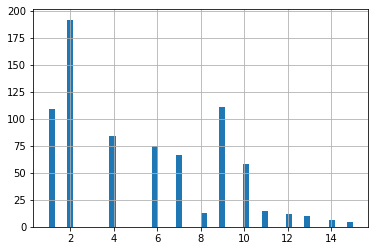

In [55]:
#representing the no. of wins by different teams 

match_df['winner'].hist(bins = 50)

In [56]:
team_encode_dict

{'team1': {'Mumbai Indians': 1,
  'Kolkata Knight Riders': 2,
  'Royal Challengers Bangalore': 3,
  'Deccan Chargers': 4,
  'Chennai Super Kings': 5,
  'Rajasthan Royals': 6,
  'Delhi Daredevils': 7,
  'Gujarat Lions': 8,
  'Kings XI Punjab': 9,
  'Sunrisers Hyderabad': 10,
  'Rising Pune Supergiant': 11,
  'Rising Pune Supergiants': 11,
  'Pune Warriors': 12,
  'Delhi Capitals': 13,
  'Kochi Tuskers Kerala': 14,
  'Draw': 15},
 'team2': {'Mumbai Indians': 1,
  'Kolkata Knight Riders': 2,
  'Royal Challengers Bangalore': 3,
  'Deccan Chargers': 4,
  'Chennai Super Kings': 5,
  'Rajasthan Royals': 6,
  'Delhi Daredevils': 7,
  'Gujarat Lions': 8,
  'Kings XI Punjab': 9,
  'Sunrisers Hyderabad': 10,
  'Rising Pune Supergiant': 11,
  'Rising Pune Supergiants': 11,
  'Pune Warriors': 12,
  'Delhi Capitals': 13,
  'Kochi Tuskers Kerala': 14,
  'Draw': 15},
 'toss_winner': {'Mumbai Indians': 1,
  'Kolkata Knight Riders': 2,
  'Royal Challengers Bangalore': 3,
  'Deccan Chargers': 4,
  'Chenn

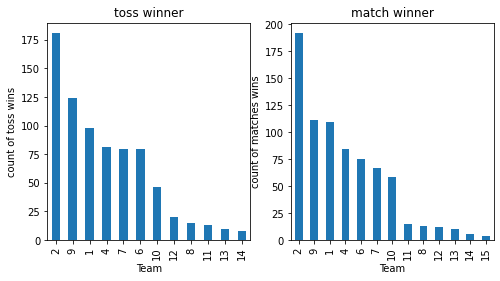

In [59]:
fig = plt.figure(figsize =(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('count of toss wins')
ax1.set_title("toss winner")
toss_wins.plot(kind = 'bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches wins')
ax2.set_title("match winner")
match_wins.plot(kind = 'bar')

In [62]:
match_df.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# Dropping of redundant columns


In [66]:
match_df = match_df[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
match_df

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,4,Hyderabad,field,4,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11
2,8,2,Rajkot,field,2,Saurashtra Cricket Association Stadium,2
3,11,9,Indore,field,9,Holkar Cricket Stadium,9
4,4,7,Bangalore,bat,4,M Chinnaswamy Stadium,4
...,...,...,...,...,...,...,...
751,2,1,Mumbai,field,1,Wankhede Stadium,1
752,2,1,Chennai,bat,2,M. A. Chidambaram Stadium,1
753,10,13,Visakhapatnam,field,13,ACA-VDCA Stadium,13
754,13,2,Visakhapatnam,field,2,ACA-VDCA Stadium,2


In [76]:
from sklearn.preprocessing import LabelEncoder

ftr_list = ['city' , 'toss_decision' , 'venue']
encoder = LabelEncoder()
for ftr in ftr_list:
    match_df[ftr] = encoder.fit_transform(match_df[ftr])
    print(encoder.classes_)
    
match_df

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
[0 1]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,4,15,1,4,28,10
1,1,11,27,1,11,21,11
2,8,2,29,1,2,31,2
3,11,9,16,1,9,13,9
4,4,7,2,0,4,17,4
...,...,...,...,...,...,...,...
751,2,1,24,1,1,40,1
752,2,1,8,0,2,18,1
753,10,13,32,1,13,0,13
754,13,2,32,1,2,0,2


# Machine Learning

In [79]:
from sklearn.model_selection import train_test_split

train_df , test_df = train_test_split(match_df ,test_size=0.2 , random_state = 5)
print(train_df.shape)
print(test_df.shape)

(604, 7)
(152, 7)


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


def print_model_scores(model,data,predictor,target):
    model.fit(data[predictor],data[target])
    predictions = model.predict(data[predictor])
    accuracy = accuracy_score(predictions,data[target])
    print('Acurracy: %s'%'{0:.2}'.format(accuracy))
    scores = cross_val_score(model , data[predictor] ,data[target],scoring="neg_mean_squared_error",cv=5)
    print('cross-Validation Scores : {}'.format(np.sqrt(-scores)))
    print(f'Average RMSE : {np.sqrt(-scores).mean()}')

In [89]:
#logistic regression
target_var = ['winner']
predictor_var = ['team1','team2','city','toss_decision','toss_winner','venue','winner']
model = LogisticRegression()
print_model_scores(model ,train_df , predictor_var , target_var)


Acurracy: 0.6
cross-Validation Scores : [1.65394595 1.61603535 1.45170177 1.46868131 1.42302495]
Average RMSE : 1.5226778635490859


In [90]:
#random forest 
model = RandomForestClassifier(n_estimators=100)
print_model_scores(model , train_df, predictor_var ,target_var)

Acurracy: 1.0
cross-Validation Scores : [0.42640143 0.48956044 0.56040127 0.22268089 0.27386128]
Average RMSE : 0.3945810614361546
